# Определение перспективного тарифа для телеком компании

__Цель исследования:__ сравнить два тарифных плана: «Смарт» и «Ультра» для понимания какой тариф приносит больше денег при помощи проведения предварительного анализа тарифов на небольшой выборке клиентов. На основе полученного анализа может быть произведена корректировка рекламного бюджета<br>
<br>
__Данные исследования:__ данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

__Описание тарифов:__
* Тариф __«Смарт»__
    * Ежемесячная плата: __550 рублей__
    * Включено __500 минут__ разговора, __50 сообщений__ и __15 Гб__ интернет-трафика
    * Стоимость услуг сверх тарифного пакета:
    * минута разговора: __3 рубля__
    * сообщение: __3 рубля__
    * 1 Гб интернет-трафика: __200 рублей__
    

* Тариф __«Ультра»__
    * Ежемесячная плата: __1950 рублей__
    * Включено __3000 минут__ разговора, __1000 сообщений__ и __30 Гб__ интернет-трафика
    * Стоимость услуг сверх тарифного пакета:
    * минута разговора: __1 рубль__
    * сообщение: __1 рубль__
    * 1 Гб интернет-трафика: __150 рублей__

### Содержание
<ul style="list-style:none; text-decoration: none">
    <li><a style="text-decoration: none" href="#introduction">Шаг 1. Изучение общей информации</a></li>
    <li><a style="text-decoration: none" href="#data_pre-processing">Шаг 2. Подготовка данных</a></li>
    <li><a style="text-decoration: none" href="#analysis">Шаг 3. Анализ данных</a></li>
    <li><a style="text-decoration: none" href="#research_analysis">Шаг 4. Проверка гипотезы.</a></li>
    <li><a style="text-decoration: none" href="#conclusion">Шаг 5. Общий вывод</a></li>
</ul>

# Изучение общей информации <a name="introduction"></a> 

In [1]:
#Импортирую библиотеку
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Импортирую библиотеку Pandas и с помощью метода .read_csv() создаю 5 DataFrame с данными из различных баз данных. Новые датафреймы назову следующими именами:
1. __``data_calls``__ - информация о звонках
2. __``data_internet``__ - информация об интернет-сессиях
3. __``data_messages``__ - информация о сообщениях
4. __``data_tariffs``__ - информация о тарифах
5. __``data_users``__ - информация о пользователях

In [2]:
data_calls = pd.read_csv("/datasets/calls.csv")
data_internet = pd.read_csv("/datasets/internet.csv")
data_messages = pd.read_csv("/datasets/messages.csv")
data_tariffs = pd.read_csv("/datasets/tariffs.csv")
data_users = pd.read_csv("/datasets/users.csv")


Создаю функцию для получения основной информации о датафрейме

In [3]:
def data_describe(dataframe):
    display(dataframe.head(10))
    display(dataframe.describe())
    dataframe.info()

В первом файле содержатся информация о пользователях

In [4]:
dataframe_list = [data_calls, data_internet, data_messages, data_tariffs, data_users]

for x in dataframe_list: # Применяю метод .info() ко всем датафреймам по очереди
    print(data_describe(x))   # Применяю метод .info()
    print('')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None



,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None



,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None



,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None



#### Получаю следующую структуру таблиц:
* __``data_calls``__
    * Количество столбцов: __4__
    * Количество строк: __202607__
    * Тип данных в столбцах: __float64(1), int64(1), object(2)__


* __``data_internet``__
    * Количество столбцов: __5__
    * Количество строк: __149396__
    * Тип данных в столбцах: __float64(1), int64(2), object(2)__


* __``data_messages``__
    * Количество столбцов: __3__
    * Количество строк: __123036__
    * Тип данных в столбцах: __int64(1), object(2)__    


* __``data_tariffs``__
    * Количество столбцов: __8__
    * Количество строк: __2__
    * Тип данных в столбцах: __int64(7), object(1)__   
    
    
* __``data_users``__
    * Количество столбцов: __8__
    * Количество строк: __500__
    * Тип данных в столбцах: __int64(2), object(6)__  

Исходя из анализа таблиц, можно сделать, что пропуски только встречаются в одной таблице __data_users__ в столбце __churn_date__, это в свою очередь дата прекращения пользования тарифом. То есть по факту из полученных данных можно сделать вывод, что 38 человек на момент выгрузки файла перестали пользоваться тарифом. Если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Заменять их не стал, так как значения мы в дальнейшем не будем использовать, а сами значения будут преобразованы в даты, поэтому пропуски нам никак помешают.

## Выводы

Всего для анализа мы получили пять таблиц, каждая из которых раскрывает определенную информацию:
- информацию о пользователях (500 ед.);
- информацию о звонках  (202 607 ед.);
- информацию о сообщениях  (123 036 ед.);
- информация об интернет-сессиях (149 396 ед.);
- информация об изучаемых тарифах («Смарт» и «Ультра»).

Исходя из полученных данных можно констатировать, что больше всего пользователи пользуются в тарифах звонками, на втором месте по популярности стоят интернет-сессии, а на третьем месте - сообщения.

Рассмотрим подробно данные в следующем разделе.

# Подготовьте данные <a name="data_pre-processing"></a>

#### Задача 1. Найдите и исправьте ошибки в данных.

Исходя из проведенного анализа с помощью команды __``describe()``__, нами были выявлены некоторые аномалии. 
1. Минимальное значение в столбце 0  __``duration``__ в таблице __``data_calls``__
2. Минимальное значение в столбце 0 __``mb_used``__ в таблице __``data_internet``__

Проверяем с помощью __``value_counts()``__ значения в данных столбцах. <br> Исходя из полученных данных около 19,5% от всех данных равны 0 в сто. Скорее всего предположим, что это были пропущенные звонки. Проверим в последующем как они влияют на показанные данные. 

In [5]:
data_calls["duration"].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

Исходя из полученных данных в таблице __``data_internet``__ около 13% от всех данных равны 0. Скорее всего или просто данные были внесены по техническим причинам или просто люди случайно включали Интернет у себя и сразу же отключали его. В общем так как данные значения никак не влияют на рассматриваемые нами показатели мы их оставляем.

In [6]:
data_internet["mb_used"].value_counts()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

##### Задача 2. Приведите данные к нужным типам.

Переведем все необходимые данные из строк в даты,для этого напишем функцию, которая это делает 

In [7]:
#Создаем функцию которая создаст нам новый столбец с месяцами
def transfer_time(data, row):
    data[row] = pd.to_datetime(data[row])

Применим эту функцию к необходимым столбцам

In [8]:
#Применяем функцию к тоблице data_users
transfer_time(data_users, "churn_date")
transfer_time(data_users, "reg_date")
#Применяем функцию к тоблице data_messages
transfer_time(data_messages, "message_date")
#Применяем функцию к тоблице data_calls
transfer_time(data_calls, "call_date")
transfer_time(data_internet, "session_date")

Проверяем сработала ли функция, для этого пишем другую функцию, которая выводит нам нужные значения

In [9]:
def data_info(dataframe):
    dataframe.info()

In [10]:
#Создаем массив с датофреймами
dataframe_list = [data_users, data_messages, data_calls]

#Запускаем цикл
for x in dataframe_list: # Применяю метод .info() ко всем датафреймам по очереди
    print(data_info(x))   # Применяю метод .info()
    print('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64

Теперь переходим к блоку по созданию новых сводных таблиц.

##### Задача 3. Создание новой таблицы c необходимыми данными

Для того чтобы нам создать новую таблицу по месяцам, создаем новый столбец в каждой из нужной нам для этого таблице - __``data_calls``__, __``data_internet``__ и __``data_messages``__

In [11]:
def сreating_month(data, row):
    data['month'] = data[row].dt.month

Применяем  функцию __``сreating_month()``__, создавая новые столбцы в таблице

In [12]:
сreating_month(data_calls, "call_date")
сreating_month(data_internet, "session_date")
сreating_month(data_messages, "message_date")

##### 3.1. Количество сделанных звонков и израсходованных минут разговора по месяцам.
Для подсчета количества сделанных звонков и израсходованных минут по месяцам, я воспользуюсь методом __``pivot_table``__ для группировки таблицы по столбцам __user_id__ и __month__ и посчитаю количество сделанных звонков и израсходованных минут методом __.count()__ и __.sum()__. Полученный датафрейм назову __``calls_grouped``__

In [13]:
calls_grouped = \
data_calls.pivot_table(index=["user_id", "month"], values="duration", aggfunc=["count", "sum"])
# Переименую заголовки столбцов (для удобства)
calls_grouped.columns = ["number_of_calls", "amount_of_calls"]
# Выводим первые пять строчек
calls_grouped.head(5)

number_of_calls  amount_of_calls
user_id month                                  
1000    5                   22           150.06
        6                   43           158.90
        7                   47           318.80
        8                   52           389.87
        9                   58           440.14

В конечном итоге мы получаем таблицу с количеством сделанных звонков и израсходованных минут разговора по месяцам

##### 3.2. Количество отправленных сообщений по месяцам.

Для подсчета количества отправленных сообщений для каждого пользователя по месяцам, я воспользуюсь методом __.pivot_table()__ для группировки таблицы по столбцам __user_id__ и __month__ и посчитаю сумму отправленных сообщений с помощью метода __.count()__. Полученный датафрейм назову __``messages_grouped``__

In [14]:
messages_grouped = \
data_messages.pivot_table(index=["user_id", "month"], values="message_date", aggfunc="count")
# Переименую заголовки столбцов (для удобства)
messages_grouped.columns = ["amount_of_messages"] 
# Выводим первые пять строчек
messages_grouped.head(5)

amount_of_messages
user_id month                    
1000    5                      22
        6                      60
        7                      75
        8                      81
        9                      57

##### 3.3. Объем израсходованного интернет-трафика по месяцам.

Для подсчета общего объёма израсходованного интернет-трафика для каждого пользователя по месяцам, я воспользуюсь методом __.pivot_table()__ для группировки таблицы по столбцам __user_id__ и __month__ и посчитаю сумму израсходанного интернет-трафика в каждому месяце с помощью метода __.sum()__. Полученный датафрейм назову internet_grouped

In [15]:
internet_grouped = \
data_internet.pivot_table(index=["user_id", "month"], values="mb_used", aggfunc="sum")
# Переименую заголовки столбцов (для удобства)
internet_grouped.columns = ["sum_traffic"] 
# Выводим первые пять строчек
internet_grouped.head(5)

sum_traffic
user_id month             
1000    5          2253.49
        6         23233.77
        7         14003.64
        8         14055.93
        9         14568.91

##### 3.2. Помесячная выручка с каждого пользователя

Для удобства расчёта месячной выручки (ежемесячных расходов на связь) я объединю ранее созданные датафреймы (calls_grouped, messages_grouped  internet_grouped) и датафреймы, которые были нам предоставлены (data_users и data_tariffs) в один df под названием full_user_data. Объединять таблицы буду с помощью метода __.merge()__ и __.join()__.

In [16]:
#Объединяем ранее созданные датафреймы calls_grouped, messages_grouped, internet_grouped
full_user_data = calls_grouped.join([messages_grouped, internet_grouped], how="outer")
#Сбрасываем индексы
full_user_data = full_user_data.reset_index()
#Проверяем на пропуски
full_user_data.info()
#Заменяем все пропуски 0
full_user_data = full_user_data.fillna(0)
#Смотрим заменилось ли все
full_user_data.info()
# Выводим первые пять строчек
full_user_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id               3214 non-null int64
month                 3214 non-null int64
number_of_calls       3174 non-null float64
amount_of_calls       3174 non-null float64
amount_of_messages    2717 non-null float64
sum_traffic           3203 non-null float64
dtypes: float64(4), int64(2)
memory usage: 150.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id               3214 non-null int64
month                 3214 non-null int64
number_of_calls       3214 non-null float64
amount_of_calls       3214 non-null float64
amount_of_messages    3214 non-null float64
sum_traffic           3214 non-null float64
dtypes: float64(4), int64(2)
memory usage: 150.8 KB


,user_id,month,number_of_calls,amount_of_calls,amount_of_messages,sum_traffic
0,1000,5,22.0,150.06,22.0,2253.49
1,1000,6,43.0,158.90,60.0,23233.77
2,1000,7,47.0,318.80,75.0,14003.64
3,1000,8,52.0,389.87,81.0,14055.93
4,1000,9,58.0,440.14,57.0,14568.91


На следующем этапе мы присоединяем к созданной таблице уже данные, которые будут нам необходимы для подсчета помесячной выручки с каждого пользователя из данных, которые нам предоставили в компании - __``user_id``__ и __``data_tariffs``__. 

In [17]:
#Присоединяем к вновь созданной таблице данные из user_id.
full_user_data = full_user_data.merge(data_users, on="user_id")
#Переименовываем столбец для того чтобы нам можно было объединить по общему столбцу новый датафрейм с data_tariffs.
full_user_data.rename(columns={'tariff': 'tariff_name'}, inplace=True)
#Присоединяем к вновь созданной таблице данные из data_tariffs.
full_user_data = full_user_data.merge(data_tariffs, on="tariff_name")
#проверяем на пропуски
full_user_data.info()
#Выводим первые пять строк.
full_user_data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
number_of_calls          3214 non-null float64
amount_of_calls          3214 non-null float64
amount_of_messages       3214 non-null float64
sum_traffic              3214 non-null float64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff_name              3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_m

,user_id,month,number_of_calls,amount_of_calls,amount_of_messages,sum_traffic,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,150.06,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,158.90,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,318.80,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,389.87,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,440.14,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Вот теперь мы подходим к заключительному этапу создания нового столбца. Наш алгоритм действий будет такой:
1. Создаем функцию __calculation_revenue__, которая будет полученных по каждому виду предоставленных услуг, при этом если значения будут отрацательные, то они заменены на 0, так как получается, что клиент не перерасходовал лимит.
2. На основе полученных значений будет получен столбец в котором будут суммироваться все полученные перерасходы с абонентской платой, соответствующую тарифному плану, а если перерасходов не было, то в ячейку будет подставляться просто абонентская плата. 



In [18]:
#Создаем функцию, свойства которой описаны выше
def calculation_revenue(data, value1, value2, value3, value4):
    data[value1] = (data[value2] - data[value3])*data[value4]
    data.loc[data[value1] < 0,  value1] = 0
    
#Применяем функцию для создание нового столбца по доходам, полученным от звонков 
calculation_revenue(full_user_data, "revenue_calls", "amount_of_calls", "minutes_included", "rub_per_minute")  
#Применяем функцию для создание нового столбца по доходам, полученным от сообщений 
calculation_revenue(full_user_data, "revenue_messages", "amount_of_messages", "messages_included", "rub_per_message")

#Для того чтобы получить правильное значение по доходам от Интернет-трафика переводим данные
#, которые нам нужны для расчета данного показателя из мегабайтов в гигабайты
full_user_data["sum_traffic"] = full_user_data["sum_traffic"].apply(lambda x: x/1000)
full_user_data["mb_per_month_included"] = full_user_data["mb_per_month_included"].apply(lambda x: x/1000)

#Применяем функцию для создание нового столбца по доходам, полученным от интернет-сообщений 
calculation_revenue(full_user_data, "revenue_mb", "sum_traffic", "mb_per_month_included", "rub_per_gb")

#Получаем ежемесячную выручку по каждому пользлвателю.
full_user_data["revenue_total"] = (full_user_data["revenue_messages"] + full_user_data["revenue_calls"] + full_user_data["revenue_mb"] + full_user_data["rub_monthly_fee"]).astype(int)
#Выводим первые пять значений таблицы
full_user_data.head(5)

,user_id,month,number_of_calls,amount_of_calls,amount_of_messages,sum_traffic,age,churn_date,city,first_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calls,revenue_messages,revenue_mb,revenue_total
0,1000,5,22.0,150.06,22.0,2.25349,52,NaT,Краснодар,Рафаил,...,30.72,3000,1950,150,1,1,0.0,0.0,0.0,1950
1,1000,6,43.0,158.90,60.0,23.23377,52,NaT,Краснодар,Рафаил,...,30.72,3000,1950,150,1,1,0.0,0.0,0.0,1950
2,1000,7,47.0,318.80,75.0,14.00364,52,NaT,Краснодар,Рафаил,...,30.72,3000,1950,150,1,1,0.0,0.0,0.0,1950
3,1000,8,52.0,389.87,81.0,14.05593,52,NaT,Краснодар,Рафаил,...,30.72,3000,1950,150,1,1,0.0,0.0,0.0,1950
4,1000,9,58.0,440.14,57.0,14.56891,52,NaT,Краснодар,Рафаил,...,30.72,3000,1950,150,1,1,0.0,0.0,0.0,1950


В столбце __month__  поменяем цифры на название месяца, для этого напишем словарь, в котором пропишем цифре название месяца, а затем с помощью написанной нами функции поменяем значения

In [19]:
#пишем словарь по месяцам
month = {1: "январь", 2: "февраль", 3: "март", 4: "апрель", 5: "май", 6: "июнь", 7: "июль", 8: "август", 9: "сентябрь", 10: "октябрь", 11: "ноябрь", 12: "декабрь"}

#пишем функцию, которая с помощью цикла меняет значения в столбце 
def month_category(value):
    for k,v in month.items():
        if value == k:
            return v

#применяем к столбцу month функцию month_category 
full_user_data["month"] = full_user_data["month"].apply(month_category)

Переводим столбцы number_of_calls и amount_of_messages из типа float в int

In [20]:
full_user_data["number_of_calls"] = full_user_data["number_of_calls"].astype(int)
full_user_data["amount_of_messages"] = full_user_data["number_of_calls"].astype(int)

## Выводы


На данном этапе, нами были приведены данные к нужным типам и проанализированы все данные, полученные нами, на этом этапе мы ничего не выбрасывали из данных, но мною было замечено, что минимальное значение в столбце 0  __``duration``__ в таблице __``data_calls``__ и __``mb_used``__ в таблице __``data_internet``__. В первом случае это можно объяснить пропущенными звонками, а во втором это могли быть технические причины или просто люди случайно включали Интернет у себя и сразу же отключали его.

На основе этого нами были посчитаны для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.
Все данные мы сохрали в сводную таблицу.

# Анализ данных <a name="analysis"></a> 

Для того чтобы нам проводить анализ напишем функции, которые нам позволят автоматизировать обработку данных. Всего у нас будет таких функций две:

- первая функция будем нам считать среднее значение, дисперсию и стандартное отклонение по заданному датафрейму.
- вторая функция будет строить нам столбчатую гистограмму, для этого мы используем __kind="bar"__.


In [21]:
#Пишем функцию, которая будет нам считать среднее значение, дисперсию и стандартное отклонение
def find_indicators(data, row):
    mean = data[row].mean()#рассчитываем среднее
    variance = np.var(data[row], ddof=1)#рассчитываем дисперсию
    standard_deviation = np.sqrt(variance)#рассчитываем стандартное отклонение
    print('Среднее значение: {:.2f}'.format(mean))#выводим среднее значение                       
    print('Дисперсия: {:.2f}'.format(variance))#выводим дисперсию
    print('Стандартное отклонение : {:.2f}'.format(standard_deviation))#стандартное отклонение
    print('')

    
#Пишем функцию, которая нам будет строить столбчатую гистограмму по двум тарифам - __smart__ и __ultra__
def building_histogram(data, data1, row, y, title):
    ax = data.sort_values(by=y).plot(kind='bar', x='month', y=y, figsize=(14, 7), alpha=0.3, color='red', label="ultra", grid=True, legend=True)
    data1.sort_values(by=y).plot(kind='bar',  x='month', y=y, ax=ax, color='yellow', alpha=0.2, label="smart", legend=True)

    for p in ax.patches:#пропишем значения в столбцах
        ax.annotate(str(round(p.get_height())), (p.get_x() * 1.02, p.get_height() * 1.02))
    
    plt.title('Анализ по ' + title + ' по методу: '  + y)#прописываем название столбчатой гистограммы
    plt.xlabel('Месяц')
    plt.ylabel(row)
    plt.show()

##### 3.1 Анализ показателя "количество минут в месяц"
Создадим две сводные таблицы с помощью метода __.pivot_table()__, которые будут наши рассматриваемые данные разделять на два тарифа - __ultra__ и __smart__ по столбцу __amount_of_calls__, использовав  три метода __count__, __sum__ и __mean__
<br>
<br>
Затем посчитаем среднее, дисперсию и стандартное отклонение исходя из среднего значения по количеству минут.
<br>
<br>
А потом построим столбчатые гистограммы, которые покажут нам разницу по двум тарифам по месяцам по количеству звонков, количеству минут и по среднему значению звонков в месяц.

,tariff_name,month,count,sum,mean
0,ultra,август,107,51567.06,481.935140
1,ultra,апрель,55,23753.99,431.890727
2,ultra,декабрь,139,77788.34,559.628345
3,ultra,июль,91,46888.02,515.252967
4,ultra,июнь,84,38046.21,452.931071
5,ultra,май,67,32275.49,481.723731
6,ultra,март,37,17107.31,462.359730
7,ultra,ноябрь,134,68460.94,510.902537
8,ultra,октябрь,123,64799.98,526.829106
9,ultra,сентябрь,115,58548.16,509.114435


,tariff_name,month,count,sum,mean
0,smart,август,235,93504.57,397.891787
1,smart,апрель,112,38776.93,346.222589
2,smart,декабрь,337,152221.80,451.696736
3,smart,июль,201,77485.21,385.498557
4,smart,июнь,164,61203.50,373.192073
5,smart,май,141,51495.28,365.214752
6,smart,март,77,28326.54,367.877143
7,smart,ноябрь,316,129745.29,410.586361
8,smart,октябрь,294,118268.40,402.273469
9,smart,сентябрь,260,105175.00,404.519231


Данные по дисперсии, среднему значению  и стандартному отклонению по количеству звонков в месяц

Среднее значение: 468.16
Дисперсия: 5335.66
Стандартное отклонение : 73.05

Среднее значение: 365.08
Дисперсия: 4615.91
Стандартное отклонение : 67.94



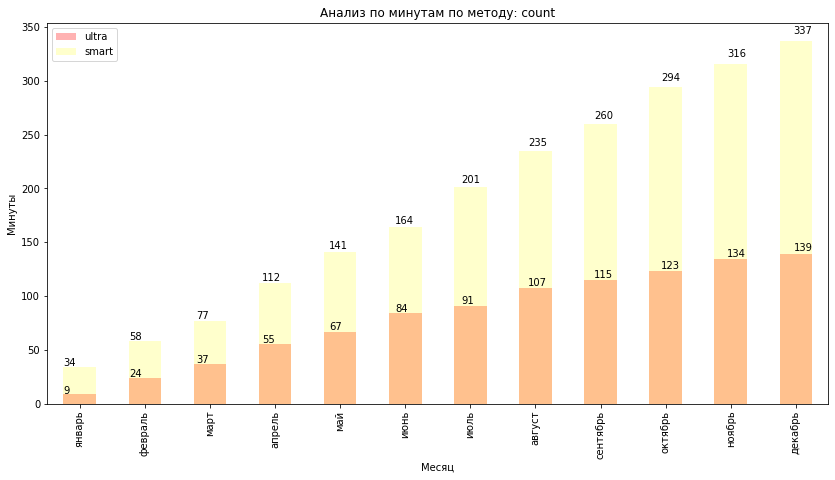

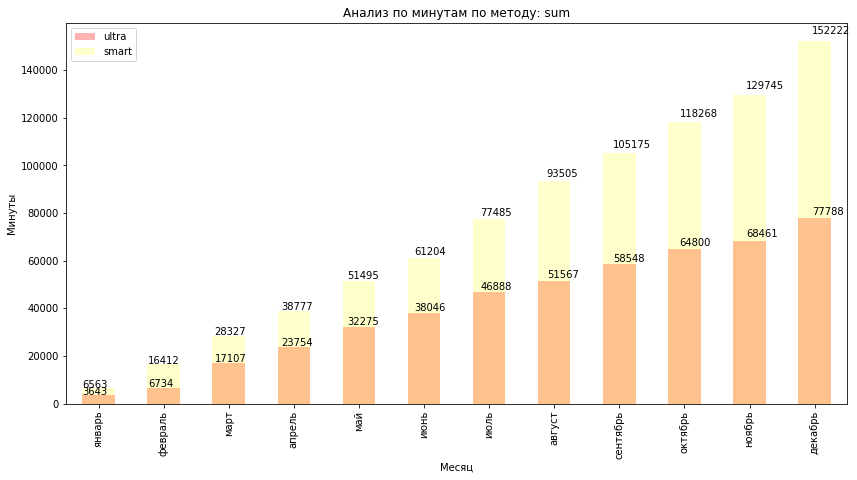

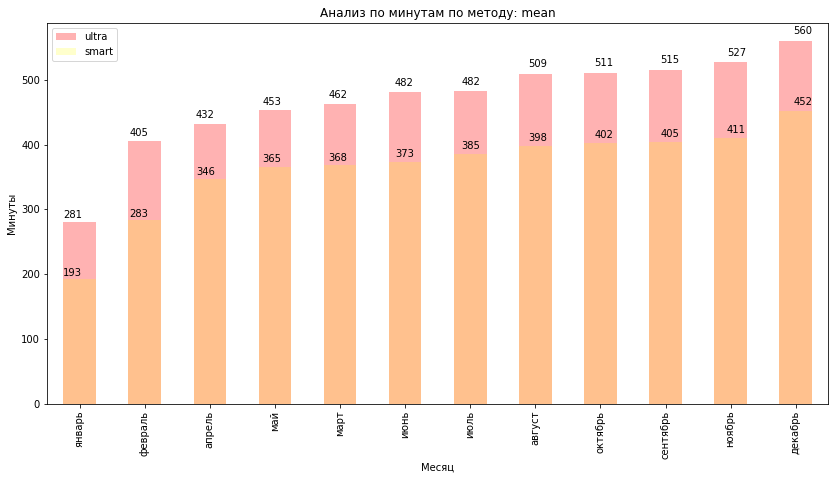

In [22]:
#Cоздадим две сводные таблицы, которые будут нам показывать количество звонков, общее количество минут по звонкам и их среднее
tariff_ultra = full_user_data.query('tariff_name == "ultra"').pivot_table(index=["tariff_name", "month"], values="amount_of_calls", aggfunc=["count", "sum", "mean"])
tariff_ultra = tariff_ultra.reset_index()#сбрасываем индексы
tariff_ultra.columns = ["tariff_name", "month", "count", "sum", "mean"]#присваиваем название колонок
    
#Cоздаем сводную таблицу в разрезе тарифа "smart"
tariff_smart = full_user_data.query('tariff_name == "smart"').pivot_table(index=["tariff_name", "month"], values="amount_of_calls", aggfunc=["count", "sum", "mean"])
tariff_smart = tariff_smart.reset_index()#сбрасываем индексы
tariff_smart.columns = ["tariff_name", "month", "count", "sum", "mean"]#присваиваем название колонок
    
#запускаем цикл, чтобы посмотреть созданные нами таблицы
for i in [tariff_ultra, tariff_smart]:
    display(i)


#Посчитаем среднее, дисперсию и стандартное отклонение.
print('Данные по дисперсии, среднему значению  и стандартному отклонению по количеству звонков в месяц')
print('')
for indicators in [tariff_ultra, tariff_smart]:
    find_indicators(indicators,  'mean')

#Построим столбчатую гистограмму
method = ['count', 'sum', 'mean']

for m in method:
    building_histogram(tariff_ultra, tariff_smart, "Минуты", m, "минутам")   

Проанализировав полученные результаты, следует отметить следующие важные особенности:
* Пользователей которые пользуются тарифом __smart__ намного больше, что видно по количеству звонков и по количеству потраченных минут, но если взять среднее по месяцу, то здесь израсходованных минут у тарифа __ultra__ в каждом месяце больше чем у тарифа __smart__, что говорит о том, что пользователь тарифа __ultra__ больше говорит в месяц.
* Среднее количество израсходованных минут у тарифа __ultra__ на __103 минуты больше__ чем у у тарифа __smart__
* Стандартное отклонения для тарифа __ultra__ на __7% больше__ чем для тарифа __smart__
* Больше  всего минут в среднем для обоих тарифов было израсходовано в __декабре__, а меньше всего в __феврале__, при этом в феврале наблюдается примерное одинаковое распределение по тарифам.

Данные показатели говорят о том, что пользователи с тарифом __ultra__ расходуют в среднем на __28% минут больше__, чем пользователи с тарифом __smart__.

##### 3.2 Анализ показателя "количество сообщений в месяц"
Создадим две сводные таблицы с помощью метода __.pivot_table()__, которые будут наши рассматриваемые данные разделять на два тарифа - __ultra__ и __smart__ по столбцу __amount_of_messages__, использовав  два метода __count__ и __mean__. Данные таблицы нам покажут количества отправленных СМС и среднее по ним.
<br>
<br>
Затем посчитаем среднее, дисперсию и стандартное отклонение исходя из среднего значения по количеству отправленных СМС.
<br>
<br>
А потом построим столбчатые гистограммы, которые покажут нам разницу по двум тарифам по месяцам по количеству отправленных смс и по их среднему.

,tariff_name,month,count,mean
0,ultra,август,107,71.289720
1,ultra,апрель,55,64.090909
2,ultra,декабрь,139,83.316547
3,ultra,июль,91,75.780220
4,ultra,июнь,84,66.738095
5,ultra,май,67,72.507463
6,ultra,март,37,67.675676
7,ultra,ноябрь,134,75.119403
8,ultra,октябрь,123,77.373984
9,ultra,сентябрь,115,74.600000


,tariff_name,month,count,mean
0,smart,август,235,58.978723
1,smart,апрель,112,51.312500
2,smart,декабрь,337,66.486647
3,smart,июль,201,56.726368
4,smart,июнь,164,55.548780
5,smart,май,141,55.241135
6,smart,март,77,54.324675
7,smart,ноябрь,316,61.503165
8,smart,октябрь,294,59.962585
9,smart,сентябрь,260,59.546154


Данные по дисперсии, среднему значению  и стандартному отклонению по количеству отправленных сообщений

Среднее значение: 69.12
Дисперсия: 116.68
Стандартное отклонение : 10.80

Среднее значение: 53.96
Дисперсия: 109.60
Стандартное отклонение : 10.47



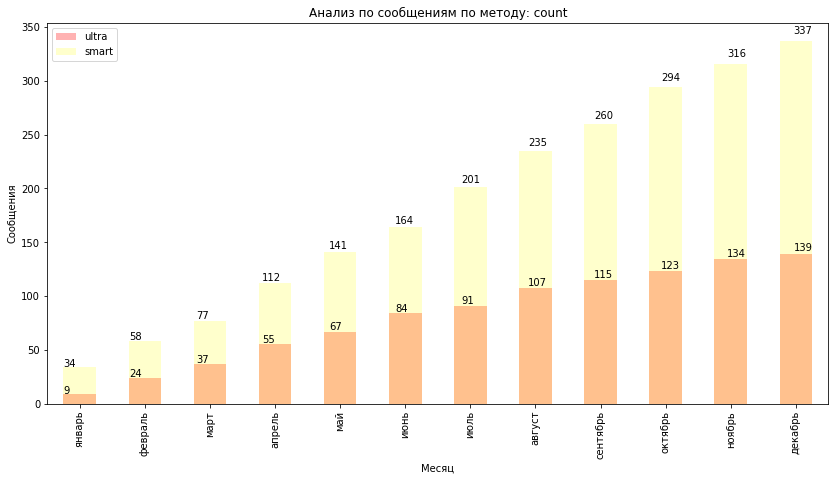

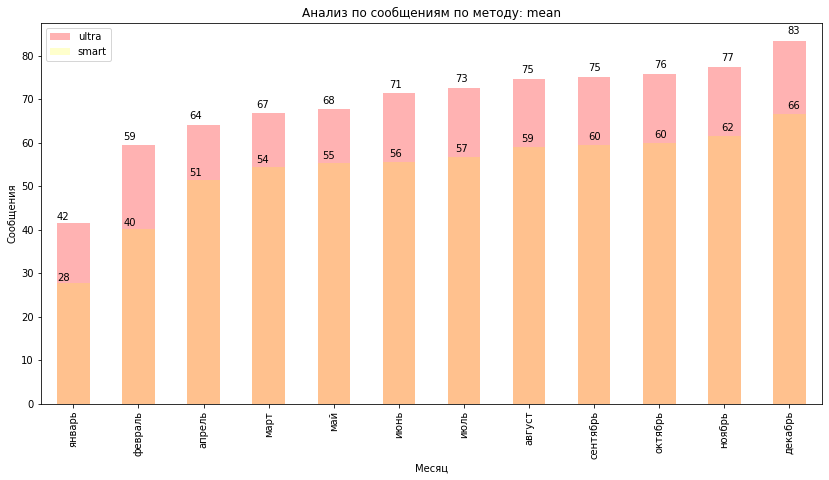

In [23]:
#Cоздадим две сводные таблицы, которые будут нам показывать количество звонков, общее количество минут по звонкам и их среднее
messages_ultra = full_user_data.query('tariff_name == "ultra"').pivot_table(index=["tariff_name", "month"], values="amount_of_messages", aggfunc=["count", "mean"])
messages_ultra = messages_ultra.reset_index()#сбрасываем индексы
messages_ultra.columns = ["tariff_name", "month", "count", "mean"]#присваиваем название колонок
    
#Cоздаем сводную таблицу в разрезе тарифа "smart"
messages_smart = full_user_data.query('tariff_name == "smart"').pivot_table(index=["tariff_name", "month"], values="amount_of_messages", aggfunc=["count", "mean"])
messages_smart = messages_smart.reset_index()#сбрасываем индексы
messages_smart.columns = ["tariff_name", "month", "count", "mean"]#присваиваем название колонок
    
#запускаем цикл, чтобы посмотреть созданные нами таблицы
for i in [messages_ultra, messages_smart]:
    display(i)

#Посчитаем среднее, дисперсию и стандартное отклонение.
print('Данные по дисперсии, среднему значению  и стандартному отклонению по количеству отправленных сообщений')
print('')
for indicators in [messages_ultra, messages_smart]:
    find_indicators(indicators, 'mean')

#Построим столбчатую гистограмму     
method = ['count', 'mean']

for m in method:
    building_histogram(messages_ultra, messages_smart, "Сообщения", m, "сообщениям")  

Проанализировав полученные результаты, следует отметить следующие важные особенности:
* Общее количество отправленных смс по тарифу __smart__ больше, но в среднем пользователь тарифа__ultra__ отправляет больше смс чем пользователь тарифа __smart__.  
* Среднее количество отправленных смс в тарифе __ultra__ на __12 смс больше__ чем в тарифе __smart__
* Стандартное отклонения для тарифа __ultra__ почти в __в раза больше__ чем для тарифа __smart__
* Больше всего минут для обоих тарифов было израсходовано в __декабре__, а меньше всего в __феврале__, при этом в феврале наблюдается примерное одинаковое распределение по тарифам. 

Данные показатели говорят о том, что пользователи с тарифом __ultra__ расходуют в среднем на __38% больше смс сообщений__ , чем пользователи с тарифом __smart__.

##### 3.3 Анализ показателя "объём интернет-трафика в месяц"

Создадим две сводные таблицы с помощью метода __.pivot_table()__, которые будут наши рассматриваемые данные разделять на два тарифа - __ultra__ и __smart__ по столбцу __sum_traffic__, использовав  два метода __sum__ и __mean__. Данные таблицы нам покажут объем используемого интернет траффика, используемого пользователями тарифов и их среднее .
<br>
<br>
Затем посчитаем среднее, дисперсию и стандартное отклонение исходя из среднего значения по количеству используемого интернет траффика.
<br>
<br>
А потом построим столбчатые гистограммы, которые покажут нам разницу по двум тарифам по месяцам по количеству используемого интернет траффика и по среднему значению.

,tariff_name,month,sum,mean
0,ultra,август,2094.63785,19.576055
1,ultra,апрель,925.54739,16.828134
2,ultra,декабрь,3029.25099,21.793173
3,ultra,июль,1865.10553,20.495665
4,ultra,июнь,1589.69490,18.924939
5,ultra,май,1297.33125,19.363153
6,ultra,март,648.81536,17.535550
7,ultra,ноябрь,2651.43287,19.786812
8,ultra,октябрь,2465.57649,20.045337
9,ultra,сентябрь,2208.49187,19.204277


,tariff_name,month,sum,mean
0,smart,август,3903.51922,16.610720
1,smart,апрель,1507.76423,13.462181
2,smart,декабрь,6104.30411,18.113662
3,smart,июль,3164.37322,15.743150
4,smart,июнь,2590.32227,15.794648
5,smart,май,2228.53099,15.805184
6,smart,март,1163.02025,15.104159
7,smart,ноябрь,5339.04014,16.895697
8,smart,октябрь,4926.59413,16.757123
9,smart,сентябрь,4238.93049,16.303579


Данные по дисперсии, среднему значению  и стандартному отклонению по объему Интернет трафика

Среднее значение: 18.21
Дисперсия: 8.92
Стандартное отклонение : 2.99

Среднее значение: 15.06
Дисперсия: 7.14
Стандартное отклонение : 2.67



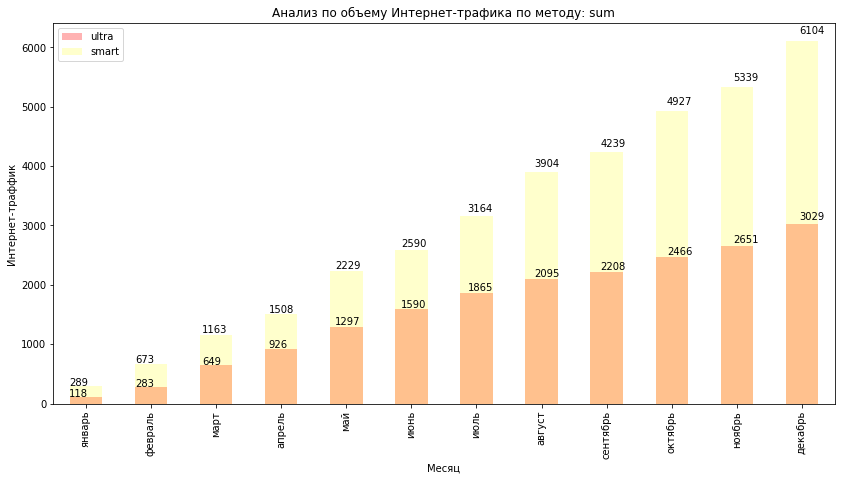

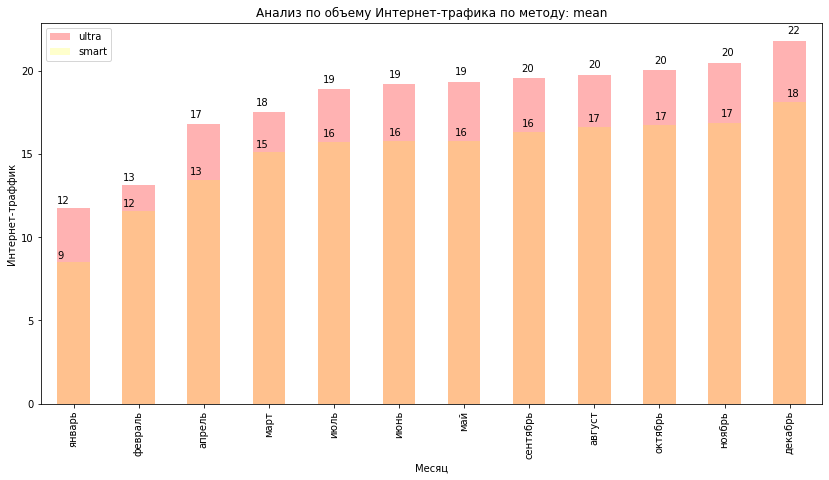

In [24]:
#Cоздадим две сводные таблицы, которые будут нам показывать количество звонков, общее количество минут по звонкам и их среднее
internet_ultra = full_user_data.query('tariff_name == "ultra"').pivot_table(index=["tariff_name", "month"], values="sum_traffic", aggfunc=["sum", "mean"])
internet_ultra = internet_ultra.reset_index()#сбрасываем индексы
internet_ultra.columns = ["tariff_name", "month", "sum", "mean"]#присваиваем название колонок
    
#Cоздаем сводную таблицу в разрезе тарифа "smart"
internet_smart = full_user_data.query('tariff_name == "smart"').pivot_table(index=["tariff_name", "month"], values="sum_traffic", aggfunc=["sum", "mean"])
internet_smart = internet_smart.reset_index()#сбрасываем индексы
internet_smart.columns = ["tariff_name", "month", "sum", "mean"]#присваиваем название колонок
    
#запускаем цикл, чтобы посмотреть созданные нами таблицы
for i in [internet_ultra, internet_smart]:
    display(i)

#Cоздадим две сводные таблицы, которые будут нам показывать количество отпрваленных сообщений и их среднее
#creating_table(internet_ultra, internet_smart, "sum_traffic", "mean", ["tariff_name", "month", "mean"])

#Посчитаем среднее, дисперсию и стандартное отклонение.
print('Данные по дисперсии, среднему значению  и стандартному отклонению по объему Интернет трафика')
print('')
for indicators in [internet_ultra, internet_smart]:
    find_indicators(indicators, 'mean')

#Построим столбчатую гистограмму
method = ['sum', 'mean']
for m in method:
    building_histogram(internet_ultra, internet_smart, "Интернет-траффик", m, "объему Интернет-трафика")  

Проанализировав полученные результаты, следует отметить следующие важные особенности:
* Общий объём трафика для тарифа __smart__  больше, но в среднем показателе объём интернет-трафика для тарифа __ultra__ в каждом месяце больше чем для тарифа __smart__, то есть пользователь тарифа __ultra__ сидит больше в Интернете, чем пользователь тарифа __smart__.
* Средний объём трафика для тарифа __ultra__ на __3.3 гб больше__ чем для тарифа __smart__
* Стандартное отклонения для тарифа __ultra__ почти на __11,9% больше__ чем для тарифа __smart__
* Больше всего интернет трафика для обоих тарифов было израсходовано в __декабре__, а меньше всего в __январе__.

Данные показатели говорят о том, что пользователи с тарифом __ultra__ расходуют в среднем на __20% больше__ интернет-трафика, чем пользователи с тарифом __smart__.

###### 3.4 Анализ показателя "Суммарная выручка по тарифному плану в месяц"

Создадим две сводные таблицы с помощью метода __.pivot_table()__, которые будут наши рассматриваемые данные разделять на два тарифа - __ultra__ и __smart__ по столбцу __revenue_total__, использовав  два метода __sum__ и __mean__. Данные таблицы нам покажут суммарную выручку по тарифам и их среднее.
<br>
<br>
Затем посчитаем среднее, дисперсию и стандартное отклонение исходя из среднего значения по суммарной выручке.
<br>
<br>
А потом построим столбчатые гистограммы, которые покажут нам разницу по двум тарифам по месяцам по суммарной выручке по тарифам и по их среднему.

,tariff_name,month,sum,mean
0,ultra,август,221831,2073.186916
1,ultra,апрель,109783,1996.054545
2,ultra,декабрь,295998,2129.482014
3,ultra,июль,192145,2111.483516
4,ultra,июнь,170810,2033.452381
5,ultra,май,137814,2056.925373
6,ultra,март,74176,2004.756757
7,ultra,ноябрь,279129,2083.052239
8,ultra,октябрь,253226,2058.747967
9,ultra,сентябрь,231683,2014.634783


,tariff_name,month,sum,mean
0,smart,август,290702,1237.029787
1,smart,апрель,101161,903.223214
2,smart,декабрь,496701,1473.890208
3,smart,июль,230221,1145.378109
4,smart,июнь,185396,1130.463415
5,smart,май,159418,1130.624113
6,smart,март,84404,1096.155844
7,smart,ноябрь,397739,1258.667722
8,smart,октябрь,376867,1281.860544
9,smart,сентябрь,305151,1173.657692


Данные по дисперсии, среднему значению  и стандартному отклонению по количеству отправленных сообщений

Среднее значение: 2040.41
Дисперсия: 3012.18
Стандартное отклонение : 54.88

Среднее значение: 1110.45
Дисперсия: 46947.08
Стандартное отклонение : 216.67



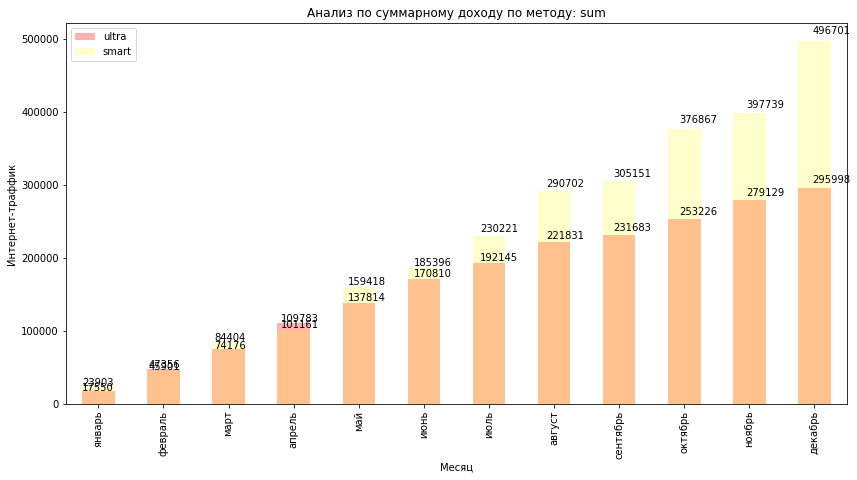

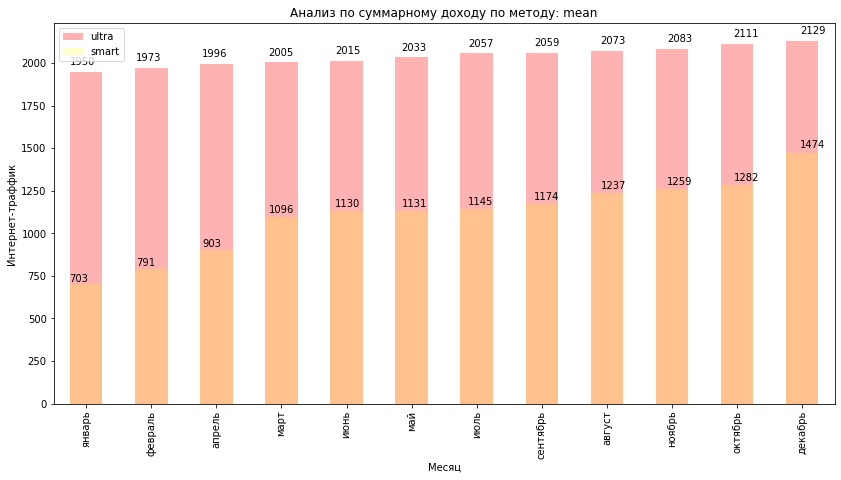

In [25]:
#Cоздадим две сводные таблицы, которые будут нам показывать количество звонков, общее количество минут по звонкам и их среднее
revenue_ultra = full_user_data.query('tariff_name == "ultra"').pivot_table(index=["tariff_name", "month"], values="revenue_total", aggfunc=["sum", "mean"])
revenue_ultra = revenue_ultra.reset_index()#сбрасываем индексы
revenue_ultra.columns = ["tariff_name", "month", "sum", "mean"]#присваиваем название колонок
    
#Cоздаем сводную таблицу в разрезе тарифа "smart"
revenue_smart = full_user_data.query('tariff_name == "smart"').pivot_table(index=["tariff_name", "month"], values="revenue_total", aggfunc=["sum", "mean"])
revenue_smart = revenue_smart.reset_index()#сбрасываем индексы
revenue_smart.columns = ["tariff_name", "month", "sum", "mean"]#присваиваем название колонок
    
#запускаем цикл, чтобы посмотреть созданные нами таблицы
for i in [revenue_ultra, revenue_smart]:
    display(i)

#Посчитаем среднее, дисперсию и стандартное отклонение.
print('Данные по дисперсии, среднему значению  и стандартному отклонению по количеству отправленных сообщений')
print('')
for indicators in [revenue_ultra, revenue_smart]:
    find_indicators(indicators, 'mean')

#Построим столбчатую гистограмму
method = ['sum', 'mean']
for m in method:
    building_histogram(revenue_ultra, revenue_smart, "Интернет-траффик", m, "суммарному доходу")  

Проанализировав полученные результаты, следует отметить следующие важные особенности:
* Общая суммарная выручка у пользователей тарифа __smart__, но в целом как и на прошлых графиках сиутация повторяется, а именно в среднем пользователь тарифа __ultra__ платит больше, чем пользователь тарифа __smart__.
* Средняя выручка  для тарифа __ultra__ выше на __930 рублей больше__ чем для тарифа __smart__
* Стандартное отклонения для тарифа __ultra__ почти в __4 раза меньше__ чем для тарифа __smart__
* Больше всего получено суммарной выручки для обоих тарифов в __декабре__, а меньше всего в __январе__.

Данные показатели говорят о том, что пользователи с тарифом __ultra__ расходуют в среднем на __83% больше__ интернет-трафика, чем пользователи с тарифом __smart__.

Для того, чтобы понять какой тариф выгоден для компании построим два боксплота, которые нам покажут медиану по суммарной выручке. Для этого создадим функцию, которая нам это сделает.

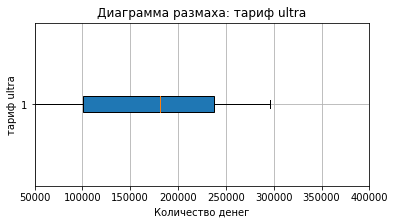

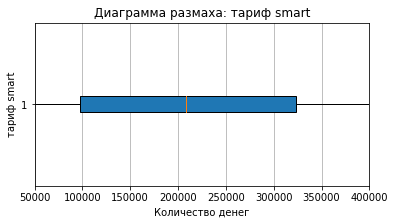

In [26]:
# создаем функцию которая нам построит ящик с усами.
def do_boxplot(data, ylabel):
    plt.figure(figsize =(6, 3)) # задаем размер фигуры

    plt.boxplot(data, # строим боксплот
               sym="o", # задаем символ выброса
               vert=False, # повернем боксплок
               widths = 0.1, # задаем толщину линий
               patch_artist = True) # заливка боксплота
    plt.ylabel(ylabel) # подпишем
    plt.xlabel("Количество денег")
    plt.xlim(50000, 400000)# пропишем значения y-oси.
    plt.title("Диаграмма размаха: " + ylabel)

    plt.grid() # отобразим сетку
    plt.show()

#строим два боксплота
do_boxplot(revenue_ultra["sum"], "тариф ultra")
do_boxplot(revenue_smart["sum"], "тариф smart")

Медианный заказ у тарифа __smart__ по суммарной выручке выше, чем у тарифа __ultra__, а датасет распределен равномерно, то есть в половине случаях данный тариф приносит больше, а в половине случаев меньше. 
То есть наш анализ показал, что несмотря на то, что больше в среднем платит пользователь тарифа __ultra__, но общая выручка компании будет выше по тарифу __smart__, так как количество пользователей приносит большую сумму, к тому же перерасход лимита больше у пользовтелей __smart__ примерно в два раза, о чем говорит полученное нами среднее.  

###### Выводы
Таким образом на основе полученного анализа сформируем следующие выводы:
- больше людей пользуются тарифом __smart__, что выражается в большем количестве звонков, израсходованных минут по тарифу, отправленных смс и объеме использованного интернет-трафика.
- пользователь тарифа __ultra__ в среднем больше общается, отправляет смс и использует больше объема трафика, что логично, так как пакет тарифного плана __ultra__ предполагает большего лимита по всем услугам компании.
- перерасход по лимитам наблюдается в основном у пользователей тарифа __smart__, при этом в среднем они тратят на тариф 1010 рублей, но и разброс по тарифу выше. По пользователям,которые используют __ultra__, перерасход практически не замечен.
- компании больше приносит денег тариф __smart__, так как данный тариф больше пользуется популярностью у посетителей.

# Проверка гипотезы <a name="research_analysis"></a>

## Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
Для проверки данной гипотезы, необходимо воспользоваться методом проверки гипотезы о равенстве средних двух генеральных совокупностей. Таким образом:
* __Нулевая гипотеза__ будет сформулирована следующим образом: средняя выручка пользователей тарифа __"Ультра"__ __равна__ средней выручке пользователей тарифа __"Смарт"__. 
* __Альтернативная гипотеза__ звучит следующим образом: средняя выручка пользователей тарифа __«Ультра»__ не равна средней выручке пользователей тарифа __«Смарт»__

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, воспользуюсь методом: __``st.ttest_ind()``__.

In [28]:
#создаем данные по пользователям тарифа ultra
array_ultra = full_user_data.query('tariff_name == "ultra"').pivot_table(index="user_id", values="revenue_total", aggfunc="mean")
#создаем данные по пользователям тарифа smart
array_smart = full_user_data.query('tariff_name == "smart"').pivot_table(index="user_id", values="revenue_total", aggfunc="mean")


alpha = .05# критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    array_ultra, 
    array_smart)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: [1.83786216e-49]
Отвергаем нулевую гипотезу


Полученное p-значение крайне маленькое и это в свою очередь говорит о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается и она не равна. Таким образом нулевая гипотеза была отвергнута.

## Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Для проверки данной гипотезы, необходимо воспользоваться методом гипотезы о равенстве средних двух генеральных совокупностей. Таким образом:

* __Нулевая гипотеза__ будет сформулирована следующим образом: средняя выручка пользователей из __Москвы__ __``равна``__ средней выручке пользователей из __других регионов__. 

* __Альтернативная гипотеза__ звучит следующим образом: средняя выручка пользователей из __Москвы__ __``не равна``__ средней выручке пользователей из __других регионов__.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, воспользуюсь методом: __``st.ttest_ind()``__.

In [29]:
#создаем данные по пользователям из города Москва
array_Moscow = full_user_data.query('city == "Москва"').pivot_table(index="user_id", values="revenue_total", aggfunc="mean")
#создаем данные пользователям из других субъектов РФ
array_other = full_user_data.query('city != "Москва"').pivot_table(index="user_id", values="revenue_total", aggfunc="mean")

alpha = .05# критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    array_Moscow, 
    array_other)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.40137799]
Не получилось отвергнуть нулевую гипотезу


Полученное __p-значение__ довольно большое и это в свою очередь говорит о том, что средняя выручка пользователей из __Москвы__ и пользователей из __остальных регионов__ не различается и она равна. Таким образом нулевая гипотеза не может быть __отвергнута__.

# Общий вывод <a name="conclusion"></a>


В ходе проведения комплексного анализа мной были проанализированы два тарифных плана телеком компании : __Смарт__ и __Ультра__. В ходе анализа были выявлены следующие интересные факторы:

1. Общее количество телефонных звонков, израсходованных минут, отправленных смс и объём интернет-трафика у пользователей тарифа __smart__ в каждом месяце больше чем у тарифа __ultra__, что обусловлено тем, что пользователей тарифа __smart__ намного больше из-за более низкой цены.
2. Но если рассматривать в среднем то пользователи __ultra__ больше тратят в месяц времени на разговоры, на отправку смс и более активно используют Интернет, что является логичным, так как лимит по тарифному плану __ultra__ намного выше, чем лимит по тарифу __smart__.
2. Для тарифа __ultra__ характерны следующие особенности:
    * Количество израсходованных минут в месяц на __103 минуты__ или __26%__ __больше__ чем у тарифа __smart__ (всего 468 минут).
    * Количество отправленных смс в месяц на __12 смс__ или __38% больше__ чем в тарифе __smart__. 
    * Объём используемого интернет-трафика в месяц на __20% больше__ чем для тарифа __smart__, разница составляет __3.3 гб__.
3. Больше всего минут, смс и интернет трафика было израсходовано в __Декабре__, наименьшее количество израсходованных минут и смс было в __Феврале__, а интернет трафика в __Январе__.
4. Перерасход по лимитам наблюдается в основном у пользователей тарифа __smart__, при этом в среднем они тратят на тариф 1010 рублей, но и разброс по тарифу выше. По пользователям,которые используют __ultra__, перерасход практически не замечен.
5. Больше денег компании приносит тариф __smart__, так как данный тариф больше пользуется популярностью у посетителей, и по нему больше наблюдается перерасход по лимиту.

Так же в ходе анализа были проверены следующие гипотезы: 
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается:
    * Данная гипотеза не была отвергнута, так как удалось выяснить, что средняя выручка пользователей тарифов __«Ультра»__ и __«Смарт»__ различается и она __не равна__.
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
    * Данная гипотеза была отвергнута, так как в ходе анализа удалось выяснить, что средняя выручка пользователей из __Москвы__ и пользователей из __остальных регионов__ не различается и она __примерно равна__.

Таким образом, по-моему мнению, более прибыльным является для компании тарифный план __Смарт__, так как пользователи данного тарифного плана расходуют меньше минут, смс и объёма интернет-трафика, но при этом они тратят на связь на __68 %__ больше, чем пользователи тарифа __Ультра__. Таким образом при продвижении тарифного плана __Смарт__ для телеком компании будет снижаться общий объём выделяемых ресурсов *(минут, смс, гб)*, что в свою очередь позволит значителько экономить на операционных издержках. То есть тариф __Смарт__ менее ресурсозатратный для компании, но при этом приносит больше ежемесячной прибыли чем тариф __Ультра__. 